In [78]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from PIL import Image

<div style="text-align: center;">
    <span style="color: red; font-size: 60px;"> Esperienza 0 </span>
</div>

<center>

# <span style="color:blue;"> Analisi delle immagini </span>

<center>

In [79]:
col = 1224
row = 1024

### Analisi del rumore medio

In [80]:
appo = 0
mean_noise = 0

for i in range(1, 81):
    path = "Dati/CAMimages/dark2x2/dark" + "{:03d}".format(i) + ".tif"
    mean_noise = mean_noise * i/(i+1) + np.array(Image.open(path))/(i+1)

del appo
del path

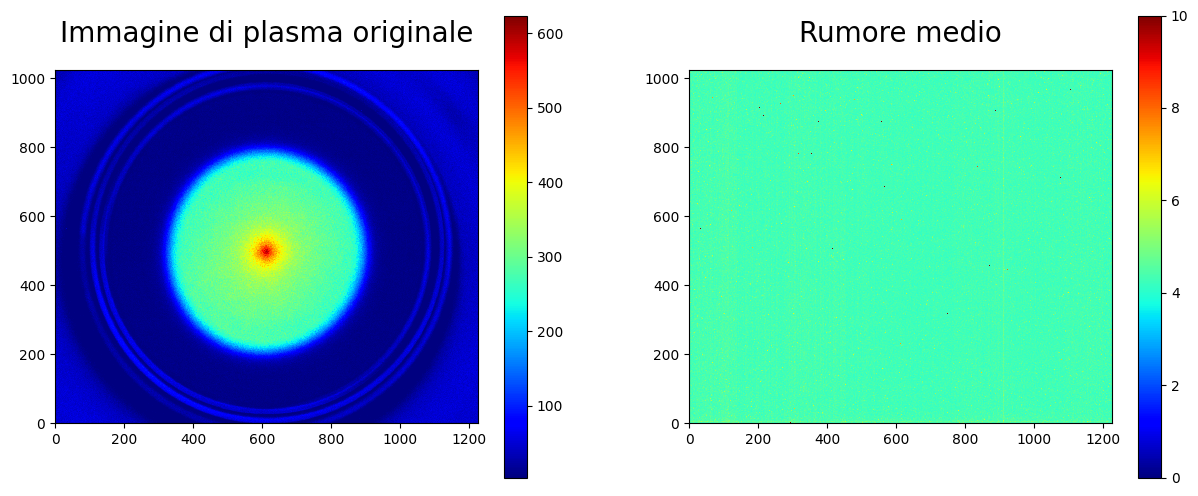

In [81]:
fig = plt.figure(figsize=(15, 6))

# Creo la griglia per gli output
x = np.linspace(0, col, col)
y = np.linspace(0, row, row)
X, Y = np.meshgrid(x, y)


#--------------------------------------------------#
#                 Plasma originale                 #
#--------------------------------------------------#
ax = fig.add_subplot(1, 2, 1)
inte = np.array(Image.open("Dati/CAMimages/plasma/plasma001.tif"))

# Faccio plot
cax = ax.pcolormesh(X, Y, inte, cmap='jet')
plt.colorbar(cax); ax.set_aspect('equal')
ax.set_title(f'Immagine di plasma originale', fontsize = 20, pad=20)


#--------------------------------------------------#
#              Calcolo rumore medio                #
#--------------------------------------------------#
ax = fig.add_subplot(1, 2, 2)
cax = ax.pcolormesh(X, Y, mean_noise, cmap='jet', vmin = 0, vmax = 10)
plt.colorbar(cax); ax.set_aspect('equal')
ax.set_title(f'Rumore medio', fontsize = 20, pad=20)

plt.show()

del inte
del x, y, X, Y

### Dimensioni della trappola

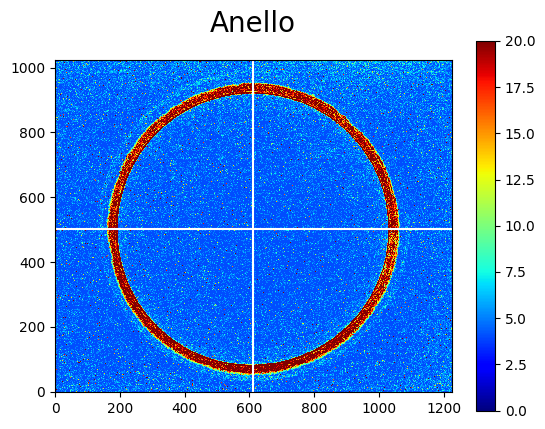

In [82]:
# Creo la griglia per gli output
x = np.linspace(0, col, col)
y = np.linspace(0, row, row)
X, Y = np.meshgrid(x, y)

ring = np.array(Image.open("Dati/CAMimages/ring2x2/ring1.tif"))

cax = plt.pcolormesh(X, Y, ring, cmap='jet', vmin = 0, vmax = 20)
plt.colorbar(cax); plt.gca().set_aspect('equal')
plt.title(f'Anello', fontsize = 20, pad=20)

plt.axhline(y=502, color='w', linestyle='-')
plt.axvline(x=612, color='w', linestyle='-')

plt.show()

del ring
del x, y, X, Y

Posso ora centrare le immagini in modo tale da effettuare dei controlli riguardo la dimensione della trappola: non ha senso che i pixel esterni si trovino ad un'intensità non nulla, poichè la loro influenza all'intensità totale è solo rumore. Il centro si trova in:
$$\left(x_c,\,y_c\right)\,=\,\left(612,\,502\right)$$

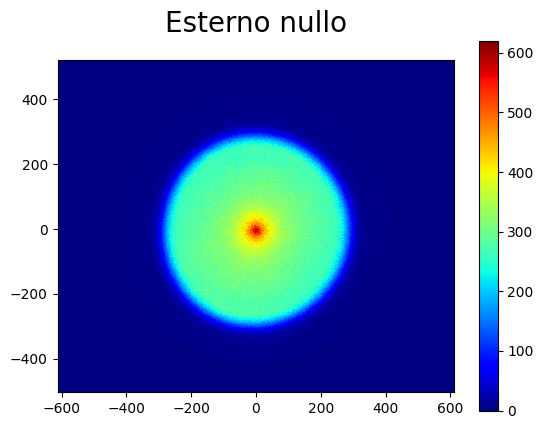

In [83]:
x = np.linspace(-col/2, col/2, col)
y = np.linspace(-row/2 + 10, row/2 + 10, row)

X, Y = np.meshgrid(x, y)



plasma = np.array(Image.open("Dati/CAMimages/plasma/plasma001.tif"))
plasma = plasma - mean_noise

mask = plasma < 0
plasma[mask] = 0

mask = (X*X + Y*Y) > pow(419, 2)
plasma[mask] = 0

# Faccio plot
cax = plt.pcolormesh(X, Y, plasma, cmap='jet')
plt.colorbar(cax); plt.gca().set_aspect('equal')
plt.title(f'Esterno nullo', fontsize = 20, pad=20)

plt.show()

del x, y, X, Y

### Riflessioni